In [28]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [29]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [30]:
sc = StandardScaler()
sc.fit(X_train)

# fit function checks the data and learn the parameters mean and std so that when calling transform it can transfrom 
# the data using learnt mean and std

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(n_iter = 30, eta0 = 0.1, random_state=0)
ppn.fit(X_train_std,y_train)

y_pred = ppn.predict(X_test_std)
print("Missclassified samples: %d" % (y_test !=y_pred).sum())

Missclassified samples: 2


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [33]:
print("Accuracy score %.2f" % accuracy_score(y_test,y_pred))

Accuracy score 0.96


In [50]:
def plot_decision_region(X,y,classifier,test_idx = None,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min ,x1_max = X[:,0].min() - 1 , X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1 , X[:,1].max() + 1
    
    # now plot the decision region
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.figure(figsize=(12,8))
    plt.contourf(xx1,xx2,z,alpha = 0.4,cmap=cmap)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    #plot all samples(scatter)
    
    x_test, y_test = X[test_idx,:] , y[test_idx]
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x =X[y==cl , 0], y = X[y ==cl,1],alpha = 0.8, c=cmap(idx),marker=markers[idx],label=cl)
    if test_idx:
        x_test, y_test = X[test_idx,:] , y[test_idx]
        plt.scatter(x_test[:,0],x_test[:,1],color='grey',alpha=1.0,linewidth=1,marker = 'o',s=55,label='test set')   

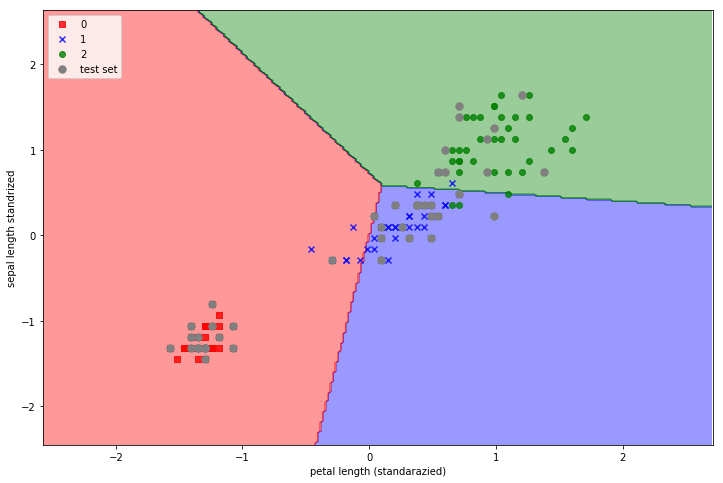

In [51]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X=X_combined_std, y=y_combined,classifier= ppn, test_idx = range(105,150))
plt.xlabel('petal length (standarazied)')
plt.ylabel("sepal length standrized")
plt.legend(loc = 'upper left')
plt.show()
